In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import chi2_contingency
from rich.console import Console
from rich.table import Table
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [28]:
data = pd.read_csv('FDI.csv')
print(data.head())

                     Sector  2000-01  2001-02  2002-03  2003-04  2004-05  \
0  METALLURGICAL INDUSTRIES    22.69    14.14    36.61     8.11   200.38   
1                    MINING     1.32     6.52    10.06    23.48     9.92   
2                     POWER    89.42   757.44    59.11    27.09    43.37   
3   NON-CONVENTIONAL ENERGY     0.00     0.00     1.70     4.14     1.27   
4           COAL PRODUCTION     0.00     0.00     0.00     0.04     0.00   

   2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  2011-12  2012-13  \
0   149.13   169.94  1175.75   959.94   419.88  1098.14  1786.14  1466.23   
1     7.40     6.62   444.36    34.16   174.40    79.51   142.65    57.89   
2    72.69   157.15   988.68   907.66  1271.79  1271.77  1652.38   535.68   
3     1.35     2.44    58.82   125.88   622.52   214.40   452.17  1106.52   
4     9.14     1.30    14.08     0.22     0.00     0.00     0.00     0.00   

   2013-14  2014-15  2015-16  2016-17  
0   567.63   359.34   456.31  1440.18  


In [29]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
if missing_values.empty:
    print("NO Missing Values :)")
else:
    print("Missing Values:\n", missing_values)
    plt.figure(figsize=(10, 4))
    sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
    plt.xticks(rotation=5)
    plt.xlabel('Features')
    plt.ylabel('Number of Missing Values')
    plt.title('Missing Values in Dataset')
    plt.show()

NO Missing Values :)


In [30]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB
None


In [31]:
num_stats = data.describe()
print("Summary Statistics for Numerical Variables:\n")
print(num_stats)

categorical_stats = data.describe(include='object')
print("\nSummary Statistics for Categorical Variables:\n")
print(categorical_stats)

Summary Statistics for Numerical Variables:

          2000-01     2001-02     2002-03     2003-04     2004-05  \
count   63.000000   63.000000   63.000000   63.000000   63.000000   
mean    37.757302   63.931587   42.925714   34.727778   51.090317   
std    112.227860  157.878737   86.606439   67.653735  101.934873   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.200000    0.215000    0.715000   
50%      4.030000    5.070000   11.010000    6.370000    9.090000   
75%     23.510000   44.830000   36.555000   38.660000   43.205000   
max    832.070000  873.230000  419.960000  368.320000  527.900000   

           2005-06      2006-07      2007-08      2008-09      2009-10  \
count    63.000000    63.000000    63.000000    63.000000    63.000000   
mean     87.932540   198.281905   390.085714   498.348571   410.069524   
std     206.436967   686.783115  1026.249935  1134.649040   926.814626   
min       0.000000     0.000000     0

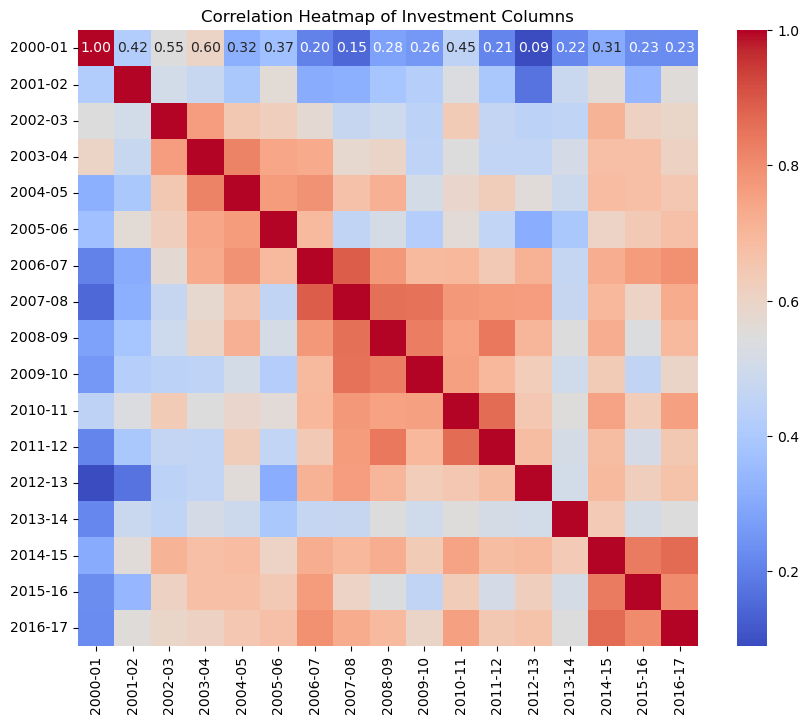

In [32]:
numeric_data = data.drop(columns=['Sector'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Investment Columns")
plt.show()

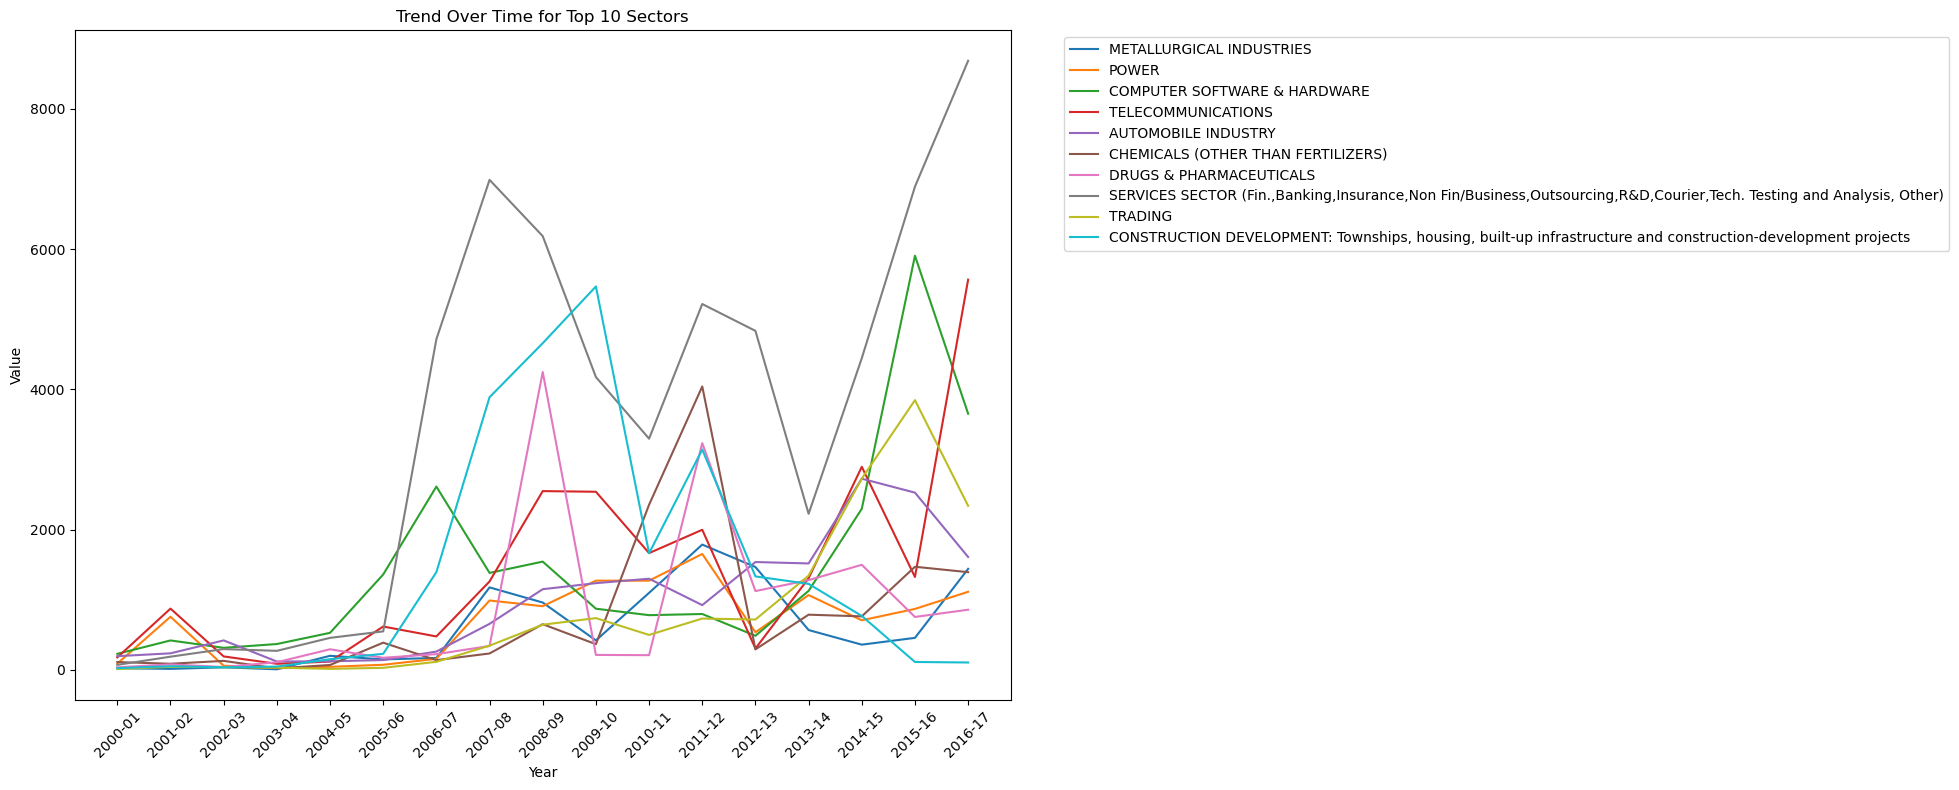

In [35]:
df_melted = data.melt(id_vars='Sector', var_name='Year', value_name='Value')


# Calculate the average value for each sector to limit the plot to the top N sectors
average_values = df_melted.groupby('Sector')['Value'].mean().sort_values(ascending=False)
top_sectors = average_values.head(10).index  # Select top 10 sectors

df_top_sectors = df_melted[df_melted['Sector'].isin(top_sectors)]

# Line plot for trends over time for top sectors
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_top_sectors, x='Year', y='Value', hue='Sector')
plt.title('Trend Over Time for Top 10 Sectors')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

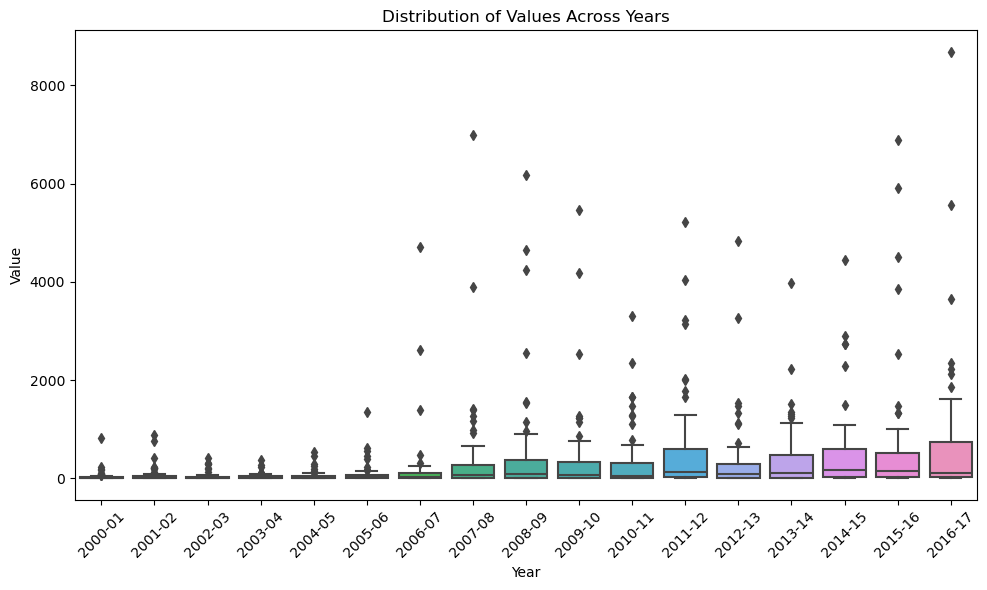

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='Year', y='Value')
plt.title('Distribution of Values Across Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Years with significant changes in mean or standard deviation:
         Year        mean          std
6  2006-01-01  198.281905   686.783115
15 2015-01-01  634.936349  1335.307706


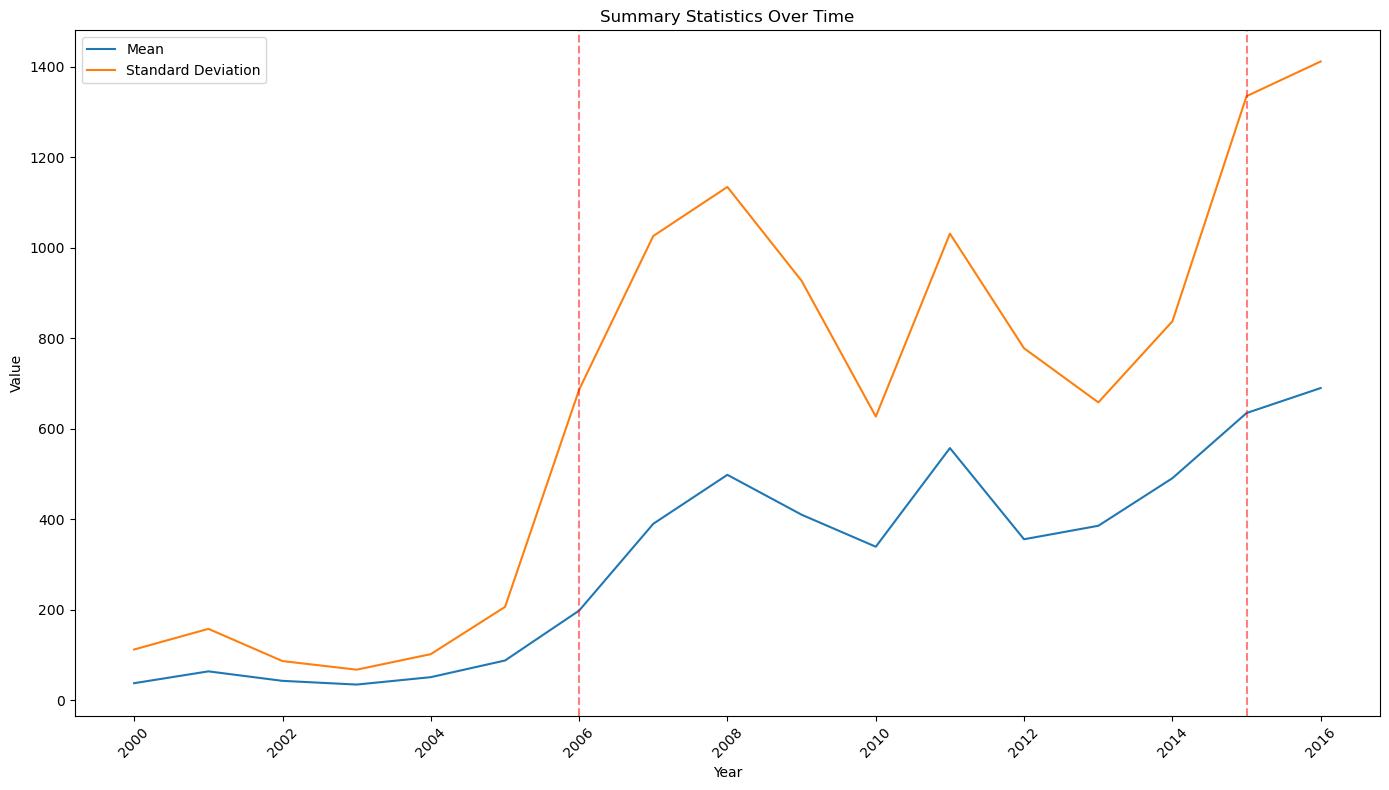

In [41]:
df_melted = df.melt(id_vars='Sector', var_name='Year', value_name='Value')
df_melted['Year'] = pd.to_datetime(df_melted['Year'].str.extract(r'(\d{4})')[0], format='%Y')

summary_stats = df_melted.groupby('Year')['Value'].agg(['mean', 'std']).reset_index()
mean_diff_std = summary_stats['mean'].std()
std_diff_std = summary_stats['std'].std()
significant_years = summary_stats[(summary_stats['mean'].diff().abs() > mean_diff_std) | 
                                  (summary_stats['std'].diff().abs() > std_diff_std)]


print("Years with significant changes in mean or standard deviation:")
print(significant_years)

plt.figure(figsize=(14, 8))
sns.lineplot(data=summary_stats, x='Year', y='mean', label='Mean')
sns.lineplot(data=summary_stats, x='Year', y='std', label='Standard Deviation')
plt.title('Summary Statistics Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
for year in significant_years['Year']:
    plt.axvline(x=year, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

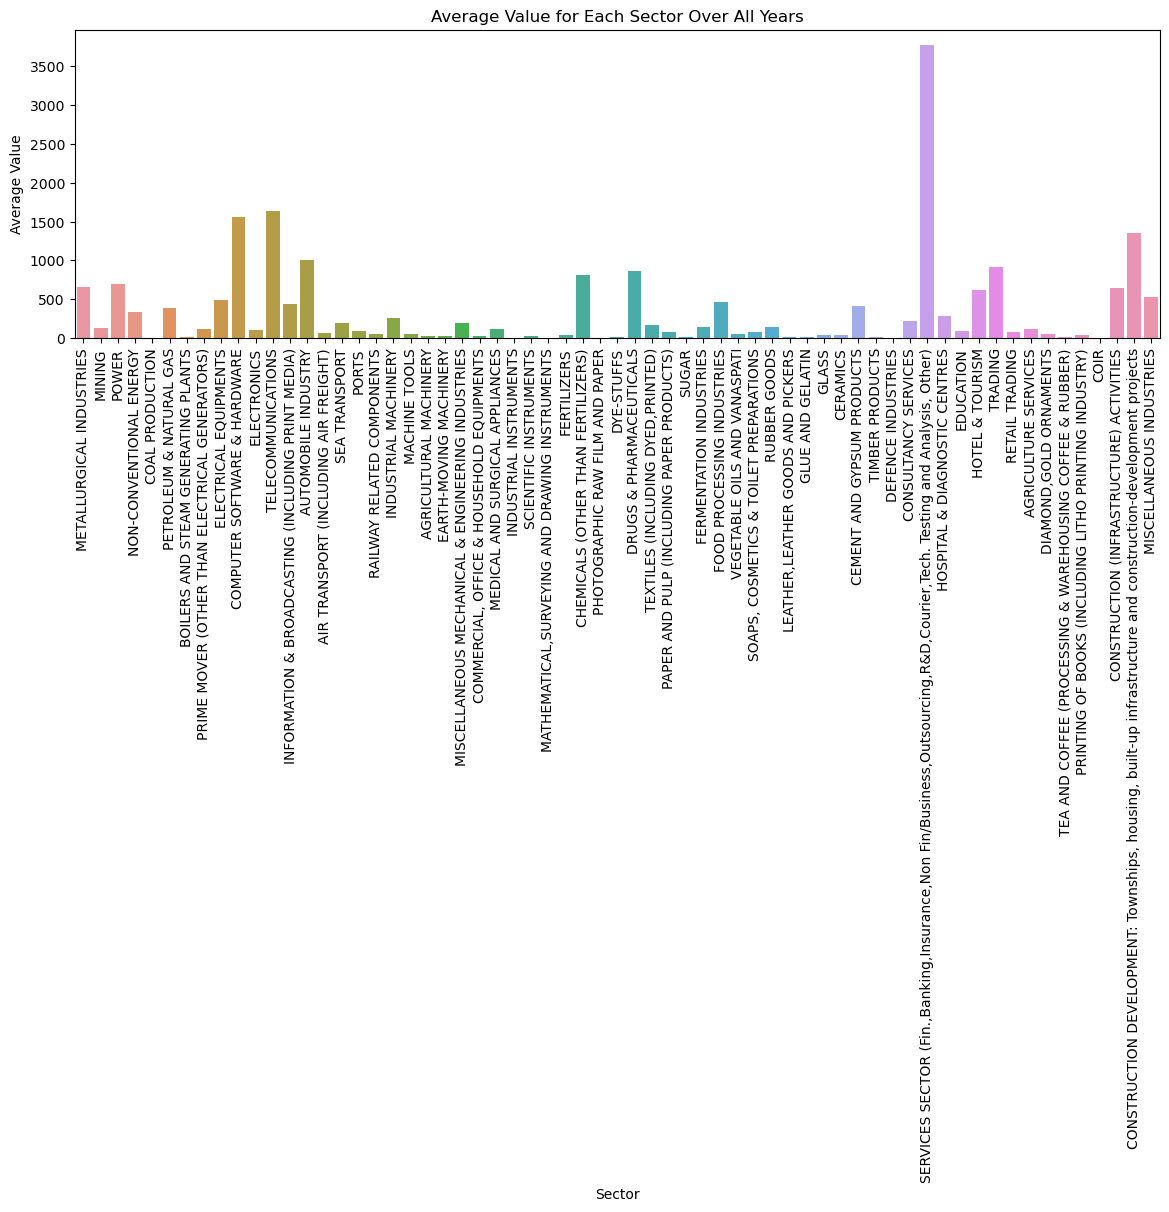

In [24]:
# Calculate average value for each sector over all years
average_values = data.set_index('Sector').mean(axis=1).reset_index()
average_values.columns = ['Sector', 'Average Value']

# Bar plot for average values
plt.figure(figsize=(14, 4))
sns.barplot(data=average_values, x='Sector', y='Average Value')
plt.title('Average Value for Each Sector Over All Years')
plt.xticks(rotation=90)
plt.show()


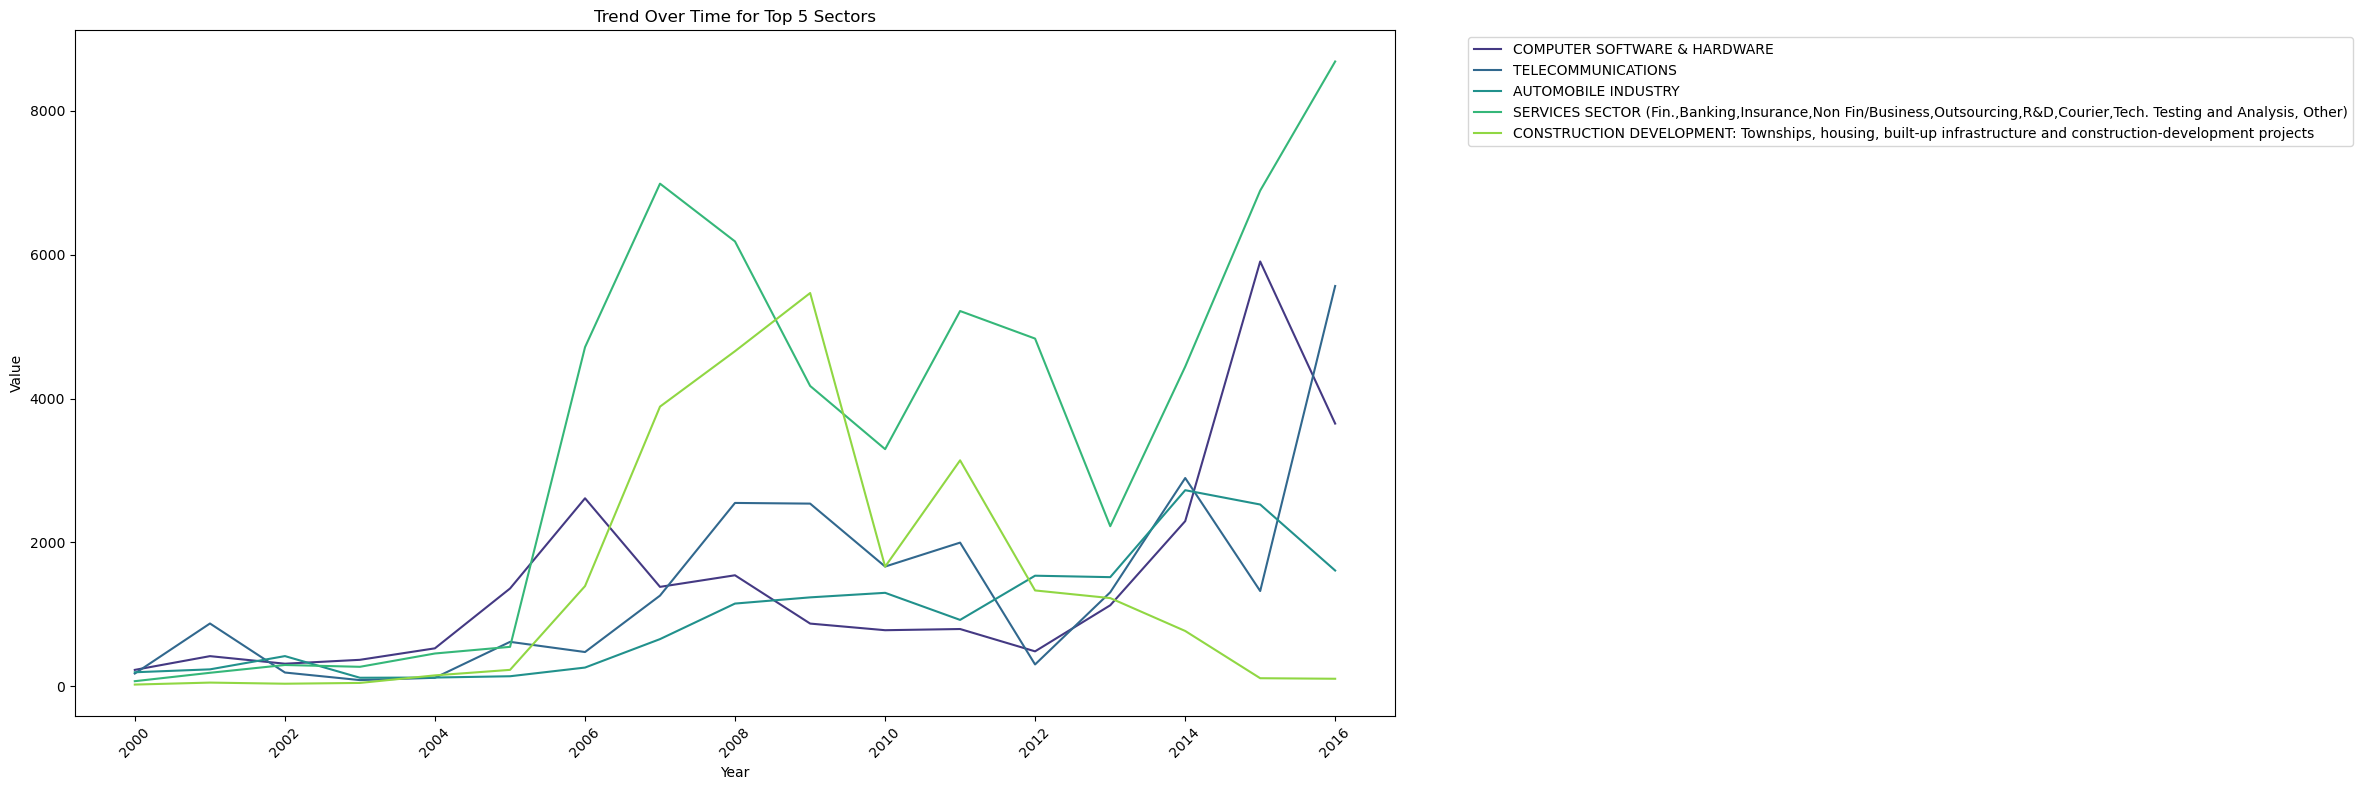

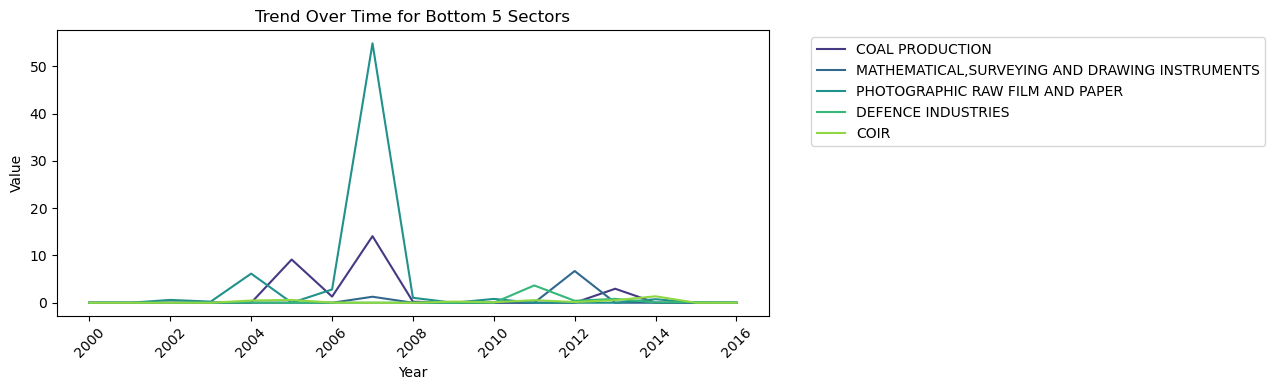

In [46]:
# Identify top 5 and bottom 5 sectors
average_values = df_melted.groupby('Sector')['Value'].mean().sort_values(ascending=False)
top_5_sectors = average_values.head(5).index
bottom_5_sectors = average_values.tail(5).index
top_5_data = df_melted[df_melted['Sector'].isin(top_5_sectors)]

plt.figure(figsize=(24, 8))
sns.lineplot(data=top_5_data, x='Year', y='Value', hue='Sector', palette='viridis')
plt.title('Trend Over Time for Top 5 Sectors')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Filter data for bottom 5 sectors
bottom_5_data = df_melted[df_melted['Sector'].isin(bottom_5_sectors)]

plt.figure(figsize=(13, 4))
sns.lineplot(data=bottom_5_data, x='Year', y='Value', hue='Sector', palette='viridis')
plt.title('Trend Over Time for Bottom 5 Sectors')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


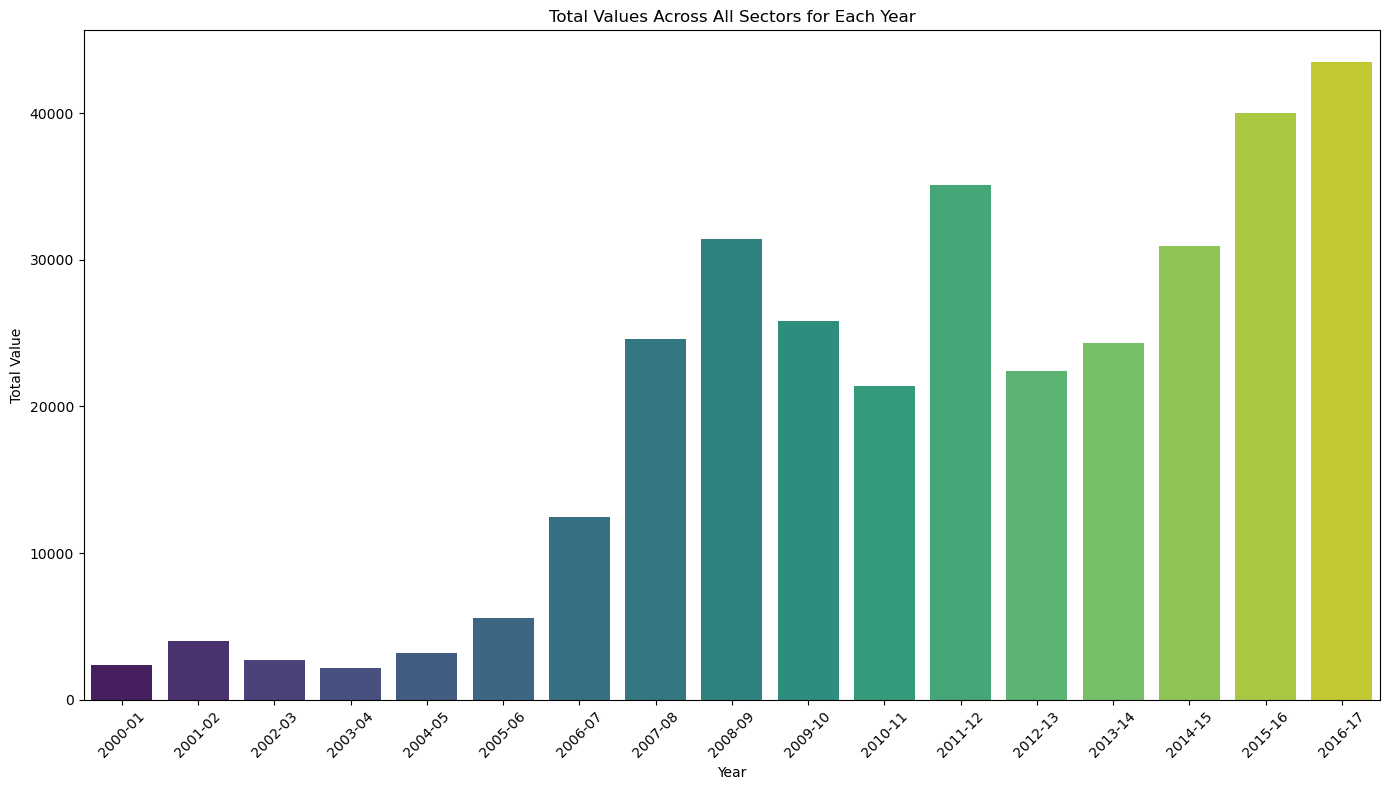

In [48]:
# Sum the values for each year across all sectors
yearly_totals = df_melted.groupby('Year')['Value'].sum().reset_index()
df_melted = data.melt(id_vars='Sector', var_name='Year', value_name='Value')
yearly_totals = df_melted.groupby('Year')['Value'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=yearly_totals, x='Year', y='Value', palette='viridis')
plt.title('Total Values Across All Sectors for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()